# Tarea - Ajuste de curvas

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [71]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

    Año  Costo Electricidad
0     1           10.051101
1     2            9.259127
2     3            9.444813
3     4            9.557723
4     5            9.977324
5     6           10.298326
6     7           10.447217
7     8           10.550506
8     9           10.590784
9    10           10.657418
10   11           10.743085
11   12           10.831965
12   13           10.988435
13   14           11.153055
14   15           11.313326
15   16           11.557165
16   17           11.860136
17   18           12.122511
18   19           12.356448
19   20           12.611391
20   21           12.814569
21   22           13.111372
22   23           13.357134
23   24           13.559012
24   25           13.858610
25   26           14.135924
26   27           14.436149


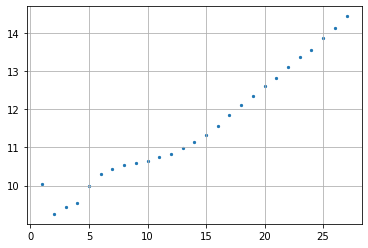

In [72]:
i = np.arange(27)
df= pd.DataFrame(index=i, columns=["Año", "Costo Electricidad"])
df["Año"] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
df["Costo Electricidad"] = [10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149]
df.head(5)
print (df)
x = df["Año"]
y = df["Costo Electricidad"]
plt.figure()
plt.scatter(x, y, s=5)
plt.grid()

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [73]:
import scipy.optimize as opt

def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 2.370488951814333
 hess_inv: array([[ 0.07661536, -0.00417866],
       [-0.00417866,  0.00030014]])
      jac: array([-3.06963921e-06,  4.30345535e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 77
      nit: 3
     njev: 22
   status: 2
  success: False
        x: array([8.92900539, 0.18667058])

In [74]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 0.8443845212931156
 hess_inv: array([[ 1.94039266e-01, -2.82082331e-02,  8.54806890e-04],
       [-2.82082331e-02,  5.25705439e-03, -1.76849189e-04],
       [ 8.54806890e-04, -1.76849189e-04,  6.31599077e-06]])
      jac: array([4.09781933e-07, 7.87526369e-06, 1.74008310e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 159
      nit: 9
     njev: 37
   status: 2
  success: False
        x: array([9.52314626e+00, 6.37449450e-02, 4.39020027e-03])

In [75]:
def funcion_de_costo_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))
costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 0.8404497314839552
 hess_inv: array([[ 3.96438829e-01, -1.07810998e-01,  7.83475500e-03,
        -1.66191756e-04],
       [-1.07810998e-01,  3.65631756e-02, -2.92187988e-03,
         6.53582321e-05],
       [ 7.83475500e-03, -2.92187988e-03,  2.47008593e-04,
        -5.73078605e-06],
       [-1.66191756e-04,  6.53582321e-05, -5.73078605e-06,
         1.36447207e-07]])
      jac: array([ 0.00000000e+00, -1.49011612e-08, -2.23517418e-08, -7.45058060e-08])
  message: 'Optimization terminated successfully.'
     nfev: 95
      nit: 10
     njev: 19
   status: 0
  success: True
        x: array([9.48692554e+00, 7.79893806e-02, 3.14121011e-03, 2.97378598e-05])

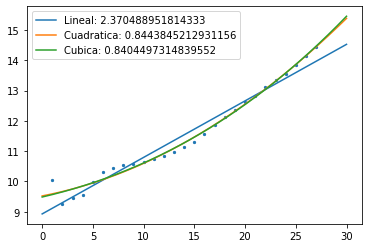

In [76]:
xn = np.linspace(0, 30, 200)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="Lineal: " + str(costo_1))
plt.plot(xn, yn2, label= "Cuadratica: " + str(costo_2))
plt.plot(xn, yn3, label="Cubica: " + str(costo_3))
plt.legend(loc="best")


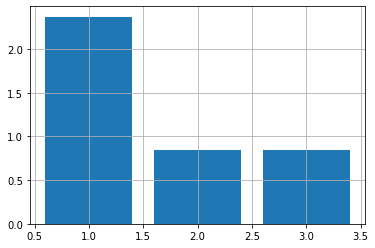

In [77]:
plt.figure()
plt.bar([1, 2, 3], [costo_1, costo_2, costo_3])
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [78]:
data = pd.read_csv('population_data.csv')

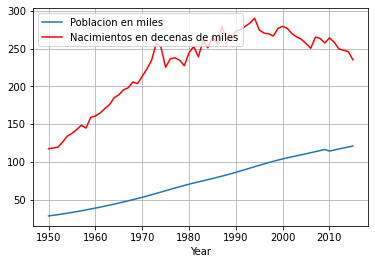

In [79]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

# Población

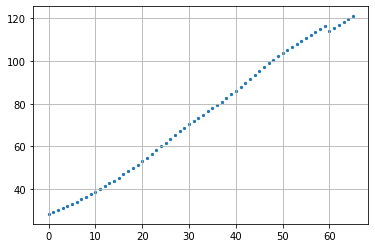

In [80]:
import matplotlib.pyplot as plt

x = data.values[:,0]-1950
y = data.values[:,1]/1000
plt.figure()
plt.scatter(x, y, s=5)
plt.grid()


In [81]:
import scipy.optimize as opt

def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 212.13716954429185
 hess_inv: array([[ 2.96246081e-02, -6.78426179e-04],
       [-6.78426179e-04,  2.08746516e-05]])
      jac: array([-9.53674316e-06, -9.53674316e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([24.1380165 ,  1.54397338])

In [82]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 210.94162188654488
 hess_inv: array([[ 6.42110243e-02, -3.92090313e-03,  4.98842637e-05],
       [-3.92090313e-03,  3.24856888e-04, -4.67664992e-06],
       [ 4.98842637e-05, -4.67664992e-06,  7.19484613e-08]])
      jac: array([3.81469727e-06, 3.81469727e-06, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([2.44254174e+01, 1.51702957e+00, 4.14520030e-04])

In [83]:
def funcion_de_costo_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))
costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 25.25499360390708
 hess_inv: array([[ 1.08421006e-01, -1.24083437e-02,  3.78801534e-04,
        -3.37330452e-06],
       [-1.24083437e-02,  1.95431564e-03, -6.78245366e-05,
         6.47635845e-07],
       [ 3.78801534e-04, -6.78245366e-05,  2.51754869e-06,
        -2.50694160e-08],
       [-3.37330452e-06,  6.47635845e-07, -2.50694160e-08,
         2.56888935e-10]])
      jac: array([-7.33709335e-03, -1.77553415e-01, -3.62434292e+00,  2.49146130e+01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 297
      nit: 9
     njev: 57
   status: 2
  success: False
        x: array([ 2.85134749e+01,  7.32202639e-01,  3.08314906e-02, -3.11966842e-04])

In [84]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype=int64)

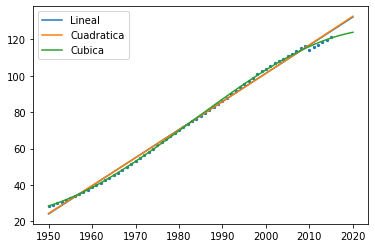

In [85]:
xn = np.linspace(0, 70, 500)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x + 1950, y, s=5)
plt.plot(xn + 1950, yn1, label="Lineal")
plt.plot(xn + 1950, yn2, label="Cuadratica")
plt.plot(xn + 1950, yn3, label="Cubica")
plt.legend(loc="best")

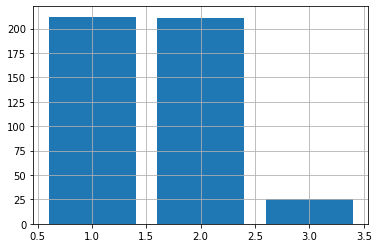

In [86]:
plt.figure()
plt.bar([1, 2, 3], [costo_1, costo_2, costo_3])
plt.grid()

# Nacimientos

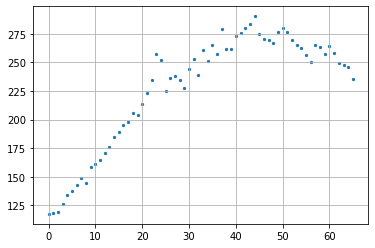

In [87]:
x = data.values[:,0]-1950
y = data.values[:,2]/10000
plt.figure()
plt.scatter(x, y, s=5)
plt.grid()

In [88]:
import scipy.optimize as opt

def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 47379.12262316294
 hess_inv: array([[ 1.53975381e-04, -7.94633250e-06],
       [-7.94633250e-06,  2.81954225e-06]])
      jac: array([0.        , 0.00097656])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 36
      nit: 8
     njev: 12
   status: 2
  success: False
        x: array([156.29922306,   2.19763686])

In [89]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 4929.21048963823
 hess_inv: array([[ 1.69528644e-02, -8.37724656e-07, -6.57085574e-06],
       [-8.37724656e-07,  6.96163625e-08, -1.00362740e-09],
       [-6.57085574e-06, -1.00362740e-09,  4.64625236e-09]])
      jac: array([0.00000000e+00, 0.00000000e+00, 6.10351562e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 175
      nit: 7
     njev: 41
   status: 2
  success: False
        x: array([ 1.02110656e+02,  7.27781471e+00, -7.81565811e-02])

In [90]:
def funcion_de_costo_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))
costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 4417.826797339631
 hess_inv: array([[ 1.08421552e-01, -1.24084153e-02,  3.78831395e-04,
        -3.37381646e-06],
       [-1.24084153e-02,  1.95428508e-03, -6.78277542e-05,
         6.47703606e-07],
       [ 3.78831395e-04, -6.78277542e-05,  2.51947091e-06,
        -2.51027935e-08],
       [-3.37381646e-06,  6.47703606e-07, -2.51027935e-08,
         2.57464542e-10]])
      jac: array([9.13696289e-02, 8.23944092e+00, 3.35878845e+02, 1.93956855e+04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 257
      nit: 4
     njev: 49
   status: 2
  success: False
        x: array([ 1.08840473e+02,  5.98471579e+00, -2.80212829e-02, -5.14308814e-04])

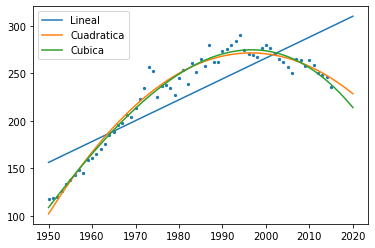

In [91]:
xn = np.linspace(0, 70, 500)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x + 1950, y, s=5)
plt.plot(xn + 1950, yn1, label="Lineal")
plt.plot(xn + 1950, yn2, label="Cuadratica")
plt.plot(xn + 1950, yn3, label="Cubica")
plt.legend(loc="best")

0 es el año 1950 y 70 es el año 2020

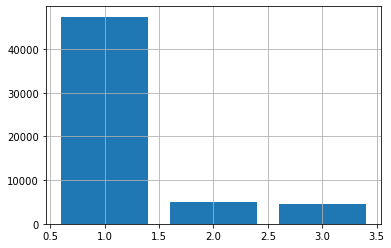

In [92]:
plt.figure()
plt.bar([1, 2, 3], [costo_1, costo_2, costo_3])
plt.grid()